# Model Training

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Data/restaurant_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,multiple_deliveries,City,distance,time_diff_minutes,Time_taken (min)
0,0,36.0,4.2,Fog,Jam,2,Snack,3.0,Metropolitian,10.283809,27,46
1,1,21.0,4.7,Stormy,High,1,Meal,1.0,Metropolitian,6.244278,20,23
2,2,23.0,4.7,Sandstorms,Medium,1,Drinks,1.0,Metropolitian,13.792189,47,21
3,3,34.0,4.3,Sandstorms,Low,0,Buffet,0.0,Metropolitian,2.931178,49,20
4,4,24.0,4.7,Fog,Jam,1,Snack,1.0,Metropolitian,19.402707,30,41


In [4]:
df.drop(columns=['Type_of_order','time_diff_minutes'], inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0                 0
Delivery_person_Age        0
Delivery_person_Ratings    0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
multiple_deliveries        0
City                       0
distance                   0
Time_taken (min)           0
dtype: int64

In [6]:
# Independent and dependent features
X = df.drop(labels=['Time_taken (min)'],axis=1)
y = df[['Time_taken (min)']]

In [7]:
df.dtypes

Unnamed: 0                   int64
Delivery_person_Age        float64
Delivery_person_Ratings    float64
Weather_conditions          object
Road_traffic_density        object
Vehicle_condition            int64
multiple_deliveries        float64
City                        object
distance                   float64
Time_taken (min)             int64
dtype: object

In [8]:
# Separating Numerical and categorical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [9]:
categorical_cols, numerical_cols

(Index(['Weather_conditions', 'Road_traffic_density', 'City'], dtype='object'),
 Index(['Unnamed: 0', 'Delivery_person_Age', 'Delivery_person_Ratings',
        'Vehicle_condition', 'multiple_deliveries', 'distance'],
       dtype='object'))

In [11]:
for i in categorical_cols:
    print(f"{i} : {df[i].unique()}")

Weather_conditions : ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny']
Road_traffic_density : ['Jam' 'High' 'Medium' 'Low']
City : ['Metropolitian' 'Urban' 'Semi-Urban']


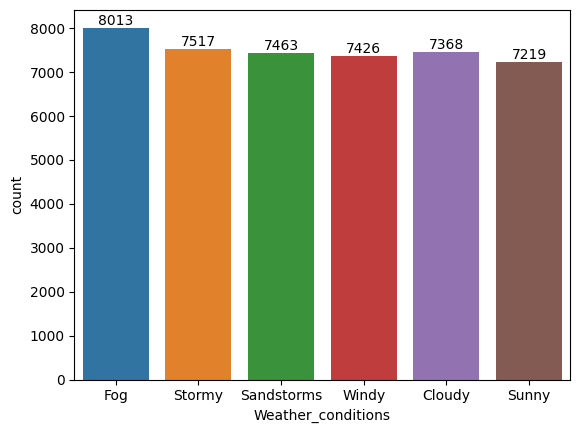

In [19]:
import seaborn as sns
gr = sns.countplot(x = df['Weather_conditions'])

abs_values = df['Weather_conditions'].value_counts(ascending=False).values

gr.bar_label(container=gr.containers[0], labels=abs_values)
plt.show()

In [13]:
# Define the custom ranking for each ordinal variable
Weather_conditions_categories = ['Sunny','Cloudy','Windy','Sandstorms','Stormy','Fog']
Road_traffic_density_categories = ['Low', 'Medium', 'High', 'Jam']
City_categories = ['Semi-Urban','Urban','Metropolitian']

In [20]:
# Importing important libraries from sklearn
from sklearn.impute import SimpleImputer # For Handling missing values
from sklearn.preprocessing import StandardScaler # for Hndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # For performing Ordinal encoding
from sklearn.pipeline import Pipeline #For creating pipelines
from sklearn.compose import ColumnTransformer # For Merging the pipelines

In [21]:
# Numerical Pipeline
num_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

#Categorical Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[Weather_conditions_categories,Road_traffic_density_categories,City_categories])),
        ('scaler', StandardScaler())
    ]
)

preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [22]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=35)

In [23]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [24]:
X_train.head()

,num_pipeline__Unnamed: 0,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__distance,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__City
0,-0.692211,-0.974662,-0.104463,-0.020021,0.441091,-0.903859,0.265889,-0.293546,0.535372
1,1.110782,0.607913,0.832967,1.183685,0.441091,-1.194979,-1.484575,-1.096523,0.535372
2,-0.765518,0.959596,-0.416940,1.183685,-1.320812,0.686239,-1.484575,-0.293546,-1.793271
3,1.494827,1.311280,-0.416940,1.183685,0.441091,-0.119919,-0.317599,-1.096523,0.535372
4,1.531975,-0.974662,-0.729416,-1.223727,0.441091,-1.178777,-0.317599,-1.096523,0.535372


In [25]:
# Model Training
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
regression.coef_

array([[-0.02567163,  2.31312417, -2.24187753, -1.98480379,  2.08642829,
         1.85479666,  1.17302438,  3.00407479,  0.67907164]])

In [28]:
regression.intercept_

array([26.27710767])

In [29]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae, rmse, r2_square

In [30]:
#Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #make prediction
    y_pred=model.predict(X_test)
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 6.574977464551838
MAE: 5.201911562882734
R2 score 51.03892123555883


Lasso
Model Training Performance
RMSE: 6.998050017985721
MAE: 5.575106614343524
R2 score 44.535318262323244


Ridge
Model Training Performance
RMSE: 6.57497543325682
MAE: 5.201910105537103
R2 score 51.03895148794542


ElasticNet
Model Training Performance
RMSE: 7.073572585753677
MAE: 5.648699464582385
R2 score 43.33171496912958




In [58]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet']